### Stochastic Gradient Descent with momentum

In [66]:
import numpy as np 
var = np.poly1d([0.5, -30, 100]) 
print("Polynomial function, f(x):\n", var)
derivative = var.deriv() 
print("Derivative, f(x)'=", derivative)
starting=20
learning=0.1
momentum=0.9
b=0
descent=[]
while derivative(starting)!=0:
    descent.append(starting)
    b=(b*momentum)+derivative(starting)
    starting=starting-(learning*b)

Polynomial function, f(x):
      2
0.5 x - 30 x + 100
Derivative, f(x)'=  
1 x - 30


### Plotting the results

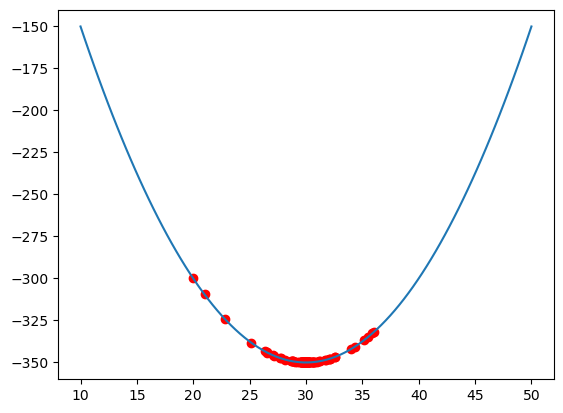

In [67]:
import matplotlib.pyplot as plt

y = var(descent)
x_vals = np.linspace(10, 50, 100)
y_vals = var(x_vals)
plt.plot(x_vals, y_vals)
plt.scatter(descent, y, c='r')
plt.show()

## Lasso, Ridge and Elastic Net Regularisation

### Loading the dataset

In [68]:
import pandas as pd
data=pd.read_csv('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/cardio_train.csv', delimiter=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Checking for null values

In [69]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

### Dropping IDs

In [70]:
data=data.drop(columns='id',axis=1)

### Standardising the data

In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=['age','height','weight','ap_hi','ap_lo']
temp = data.drop(x, axis=1)
data=pd.concat([temp, pd.DataFrame(sc.fit_transform(data[x]), columns=x)], axis=1)
data.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age,height,weight,ap_hi,ap_lo
0,2,1,1,0,0,1,0,-0.436062,0.443452,-0.847873,-0.122182,-0.088238
1,1,3,1,0,0,1,1,0.307686,-1.018168,0.749831,0.072610,-0.035180
2,1,3,1,0,0,0,1,-0.247997,0.078047,-0.708942,0.007679,-0.141297
3,2,1,1,0,0,1,1,-0.748152,0.565254,0.541435,0.137541,0.017879
4,1,1,1,0,0,0,0,-0.808543,-1.018168,-1.264666,-0.187113,-0.194356


### Splitting the data into train and test

In [72]:
x=data.drop(columns='cardio')
y=data['cardio']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

### Importing necessary libraries

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from keras import regularizers

### Fitting the first model without any regularization

In [74]:
model = Sequential([ 
    Dense(input_dim=11,units=64, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=1, activation='sigmoid')
]) 

In [75]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

In [76]:
model.fit(x_train, y_train, epochs=100,  
          batch_size=1000,  
          validation_split=0.2) 

Epoch 1/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.5940 - val_loss: 0.6369 - val_accuracy: 0.6418
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6251 - accuracy: 0.6539 - val_loss: 0.6212 - val_accuracy: 0.6604
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6100 - accuracy: 0.6732 - val_loss: 0.6062 - val_accuracy: 0.6785
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.6890 - val_loss: 0.5931 - val_accuracy: 0.6942
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5823 - accuracy: 0.7079 - val_loss: 0.5789 - val_accuracy: 0.7119
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5715 - accuracy: 0.7209 - val_loss: 0.5692 - val_accuracy: 0.7203
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.7261 - val_loss: 0.5654 - val_accuracy: 0.7239
Epoch 8/100
4

Epoch 59/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5374 - accuracy: 0.7398 - val_loss: 0.5456 - val_accuracy: 0.7316
Epoch 60/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5371 - accuracy: 0.7391 - val_loss: 0.5452 - val_accuracy: 0.7304
Epoch 61/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5378 - accuracy: 0.7381 - val_loss: 0.5455 - val_accuracy: 0.7311
Epoch 62/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5365 - accuracy: 0.7391 - val_loss: 0.5451 - val_accuracy: 0.7322
Epoch 63/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5372 - accuracy: 0.7387 - val_loss: 0.5459 - val_accuracy: 0.7326
Epoch 64/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.7397 - val_loss: 0.5456 - val_accuracy: 0.7311
Epoch 65/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5374 - accuracy: 0.7396 - val_loss: 0.5448 - val_accuracy: 0.7303
Epoch 

### Second model with L1 Regularization

In [108]:
model1 = Sequential([ 
    Dense(input_dim=11,units=64, activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    Dense(units=16, activation='relu',kernel_regularizer=regularizers.l1(0.01)),
    Dense(units=1, activation='sigmoid')
]) 

In [109]:
model1.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

In [110]:
model1.fit(x_train, y_train, epochs=100,  
          batch_size=1000,  
          validation_split=0.2) 

Epoch 1/100
45/45 [==============================] - 0s 2ms/step - loss: 2.6967 - accuracy: 0.5797 - val_loss: 2.3456 - val_accuracy: 0.6029
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 2.0545 - accuracy: 0.6230 - val_loss: 1.7740 - val_accuracy: 0.6250
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 1.5487 - accuracy: 0.6337 - val_loss: 1.3352 - val_accuracy: 0.6328
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 1.1663 - accuracy: 0.6391 - val_loss: 1.0099 - val_accuracy: 0.6372
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 0.8963 - accuracy: 0.6395 - val_loss: 0.7960 - val_accuracy: 0.6407
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 0.7387 - accuracy: 0.6399 - val_loss: 0.6998 - val_accuracy: 0.6392
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.6394 - val_loss: 0.6803 - val_accuracy: 0.6414
Epoch 8/100
4

Epoch 59/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6155 - accuracy: 0.7223 - val_loss: 0.6078 - val_accuracy: 0.7176
Epoch 60/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.7231 - val_loss: 0.6073 - val_accuracy: 0.7179
Epoch 61/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.7221 - val_loss: 0.6067 - val_accuracy: 0.7206
Epoch 62/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.7226 - val_loss: 0.6061 - val_accuracy: 0.7196
Epoch 63/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6136 - accuracy: 0.7231 - val_loss: 0.6058 - val_accuracy: 0.7206
Epoch 64/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.7240 - val_loss: 0.6051 - val_accuracy: 0.7196
Epoch 65/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.7235 - val_loss: 0.6050 - val_accuracy: 0.7211
Epoch 

### Third model with L2 Regularization

In [80]:
model2 = Sequential([ 
    Dense(input_dim=11,units=64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dense(units=16, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
    Dense(units=1, activation='sigmoid')
]) 

In [81]:
model2.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

In [82]:
model2.fit(x_train, y_train, epochs=100,  
          batch_size=1000,  
          validation_split=0.2) 

Epoch 1/100
45/45 [==============================] - 0s 2ms/step - loss: 1.0380 - accuracy: 0.5986 - val_loss: 0.9398 - val_accuracy: 0.6446
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 0.8775 - accuracy: 0.6521 - val_loss: 0.8254 - val_accuracy: 0.6533
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 0.7855 - accuracy: 0.6569 - val_loss: 0.7533 - val_accuracy: 0.6591
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 0.7274 - accuracy: 0.6610 - val_loss: 0.7076 - val_accuracy: 0.6636
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6907 - accuracy: 0.6665 - val_loss: 0.6794 - val_accuracy: 0.6674
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6677 - accuracy: 0.6690 - val_loss: 0.6623 - val_accuracy: 0.6675
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.6716 - val_loss: 0.6493 - val_accuracy: 0.6721
Epoch 8/100
4

Epoch 59/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.7237 - val_loss: 0.5907 - val_accuracy: 0.7190
Epoch 60/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5885 - accuracy: 0.7249 - val_loss: 0.5906 - val_accuracy: 0.7196
Epoch 61/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.7241 - val_loss: 0.5916 - val_accuracy: 0.7201
Epoch 62/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5881 - accuracy: 0.7241 - val_loss: 0.5894 - val_accuracy: 0.7196
Epoch 63/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5879 - accuracy: 0.7244 - val_loss: 0.5908 - val_accuracy: 0.7203
Epoch 64/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5876 - accuracy: 0.7246 - val_loss: 0.5903 - val_accuracy: 0.7186
Epoch 65/100
45/45 [==============================] - 0s 1ms/step - loss: 0.5872 - accuracy: 0.7247 - val_loss: 0.5890 - val_accuracy: 0.7215
Epoch 

### Fourth with Elastic Net regularization

In [83]:
model3 = Sequential([ 
    Dense(input_dim=11,units=64, activation='relu',kernel_regularizer=regularizers.l1_l2(0.01)),
    Dense(units=16, activation='relu',kernel_regularizer=regularizers.l1_l2(0.01)),
    Dense(units=1, activation='sigmoid')
]) 

In [84]:
model3.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

In [85]:
model3.fit(x_train, y_train, epochs=100,  
          batch_size=1000,  
          validation_split=0.2) 

Epoch 1/100
45/45 [==============================] - 0s 2ms/step - loss: 3.1115 - accuracy: 0.4892 - val_loss: 2.6681 - val_accuracy: 0.5868
Epoch 2/100
45/45 [==============================] - 0s 1ms/step - loss: 2.3159 - accuracy: 0.6292 - val_loss: 1.9779 - val_accuracy: 0.6496
Epoch 3/100
45/45 [==============================] - 0s 1ms/step - loss: 1.7159 - accuracy: 0.6476 - val_loss: 1.4681 - val_accuracy: 0.6430
Epoch 4/100
45/45 [==============================] - 0s 1ms/step - loss: 1.2795 - accuracy: 0.6431 - val_loss: 1.1044 - val_accuracy: 0.6384
Epoch 5/100
45/45 [==============================] - 0s 1ms/step - loss: 0.9809 - accuracy: 0.6405 - val_loss: 0.8705 - val_accuracy: 0.6423
Epoch 6/100
45/45 [==============================] - 0s 1ms/step - loss: 0.7986 - accuracy: 0.6394 - val_loss: 0.7397 - val_accuracy: 0.6396
Epoch 7/100
45/45 [==============================] - 0s 1ms/step - loss: 0.7117 - accuracy: 0.6396 - val_loss: 0.6942 - val_accuracy: 0.6413
Epoch 8/100
4

Epoch 59/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.6942 - val_loss: 0.6398 - val_accuracy: 0.6923
Epoch 60/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6398 - accuracy: 0.6952 - val_loss: 0.6391 - val_accuracy: 0.6929
Epoch 61/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6392 - accuracy: 0.6963 - val_loss: 0.6387 - val_accuracy: 0.6968
Epoch 62/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.6975 - val_loss: 0.6381 - val_accuracy: 0.6958
Epoch 63/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.6989 - val_loss: 0.6375 - val_accuracy: 0.6970
Epoch 64/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6376 - accuracy: 0.6999 - val_loss: 0.6372 - val_accuracy: 0.6977
Epoch 65/100
45/45 [==============================] - 0s 1ms/step - loss: 0.6372 - accuracy: 0.7015 - val_loss: 0.6363 - val_accuracy: 0.7000
Epoch 

### Predicting the values

In [87]:
Y_PREC = np.where(1 , model.predict(x_test) > 0.5, 0)
Y_PREC1 = np.where(1 , model1.predict(x_test) > 0.5, 0)
Y_PREC2 = np.where(1 , model2.predict(x_test) > 0.5, 0)
Y_PREC3 = np.where(1 , model3.predict(x_test) > 0.5, 0)

438/438 [==============================] - 0s 289us/step


### Confusion matrix

In [90]:
from sklearn.metrics import confusion_matrix
print("Without Regularization \n",confusion_matrix(y_test,Y_PREC))
print("L1 Regularization \n",confusion_matrix(y_test,Y_PREC1))
print("L2 Regularization \n",confusion_matrix(y_test,Y_PREC2))
print("Elastic Net Regularization \n",confusion_matrix(y_test,Y_PREC3))

Without Regularization 
 [[5497 1507]
 [2206 4790]]
L1 Regularization 
 [[5441 1563]
 [2280 4716]]
L2 Regularization 
 [[5233 1771]
 [2058 4938]]
Elastic Net Regularization 
 [[5396 1608]
 [2368 4628]]


### Accuracy Score

In [91]:
from sklearn.metrics import accuracy_score
print("Without Regularization \n",accuracy_score(y_test,Y_PREC))
print("L1 Regularization \n",accuracy_score(y_test,Y_PREC1))
print("L2 Regularization \n",accuracy_score(y_test,Y_PREC2))
print("Elastic Net Regularization \n",accuracy_score(y_test,Y_PREC3))

Without Regularization 
 0.7347857142857143
L1 Regularization 
 0.7255
L2 Regularization 
 0.7265
Elastic Net Regularization 
 0.716


### Precision and Recall

In [94]:
from sklearn.metrics import recall_score,precision_score
print("  Recall            Precision")
print("Without Regularization \n",recall_score(y_test,Y_PREC),precision_score(y_test,Y_PREC))
print("L1 Regularization \n",recall_score(y_test,Y_PREC1),precision_score(y_test,Y_PREC1))
print("L2 Regularization \n",recall_score(y_test,Y_PREC2),precision_score(y_test,Y_PREC2))
print("Elastic Net Regularization \n",recall_score(y_test,Y_PREC3),precision_score(y_test,Y_PREC3))

  Recall            Precision
Without Regularization 
 0.6846769582618639 0.7606796887406702
L1 Regularization 
 0.6740994854202401 0.7510750119445772
L2 Regularization 
 0.7058319039451115 0.7360262334177969
Elastic Net Regularization 
 0.6615208690680389 0.742142398973701


### ROC curve

Text(0.5, 1.0, 'Receiver operating characteristic')

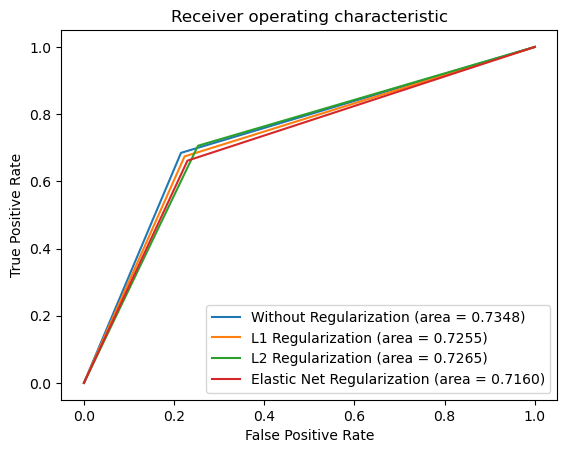

In [122]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_auc=roc_auc_score(y_test,Y_PREC)
roc_auc1=roc_auc_score(y_test,Y_PREC1)
roc_auc2=roc_auc_score(y_test,Y_PREC2)
roc_auc3=roc_auc_score(y_test,Y_PREC3)
fpr, tpr,_= roc_curve(y_test,Y_PREC)
fpr1, tpr1,_= roc_curve(y_test,Y_PREC1)
fpr2, tpr2,_= roc_curve(y_test,Y_PREC2)
fpr3, tpr3,_= roc_curve(y_test,Y_PREC3)
plt.figure()
plt.plot(fpr, tpr,label='Without Regularization (area = %0.4f)' % roc_auc)
plt.plot(fpr1, tpr1, label='L1 Regularization (area = %0.4f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='L2 Regularization (area = %0.4f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Elastic Net Regularization (area = %0.4f)' % roc_auc3)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')